In [40]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import KNNImputer
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier


In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
Data = pd.read_csv('/content/drive/MyDrive/Aprendizaje automático/titanic5.csv', sep = ',')
print(f'La cantidad de filas y columnas del set de datos original es:',Data.shape)
print('')
print(Data.head())
print('')
print(Data.describe(include="all"))
print('')

La cantidad de filas y columnas del set de datos original es: (1310, 14)

   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN

In [43]:
# Check missing values per column
print(Data.isnull().sum())
print('')

# Check data types per column
print(Data.dtypes)
print('')
print(Data.info)

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

<bound method DataFrame.info of       pclass  survived                                             name  \
0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
1        1.0       1.0                   Allison, Master. Hudson Trevor   
2        1.0       0.0                     Allison, Miss. Helen Loraine   
3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
4        1.0      

In [44]:
# Extracting the title from names

# First, remove rows with missing values in the 'name' column
Data = Data.dropna(subset=['name'])

# Function to extract the title from the name
def extract_title(name):
    # Split the name by ',' and then by '.'
    title = name.split(",")[1].split(".")[0].strip()
    return title

# Apply the function to extract titles
Data['title'] = Data['name'].apply(extract_title)

# Simplify some titles into common categories
# Group rare titles under a single category
Data['title'] = Data['title'].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col',
                                   'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

# Merge similar titles
Data['title'] = Data['title'].replace(['Mlle', 'Ms'], 'Miss')

# Standardize 'Mrs' title
Data['title'] = Data['title'].replace('Mme', 'Mrs')

# Count the number of unique titles and their occurrences
print(Data['title'].value_counts())

# Display results
print(Data[['name', 'title']])

title
Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: count, dtype: int64
                                                 name   title
0                       Allen, Miss. Elisabeth Walton    Miss
1                      Allison, Master. Hudson Trevor  Master
2                        Allison, Miss. Helen Loraine    Miss
3                Allison, Mr. Hudson Joshua Creighton      Mr
4     Allison, Mrs. Hudson J C (Bessie Waldo Daniels)     Mrs
...                                               ...     ...
1304                             Zabour, Miss. Hileni    Miss
1305                            Zabour, Miss. Thamine    Miss
1306                        Zakarian, Mr. Mapriededer      Mr
1307                              Zakarian, Mr. Ortin      Mr
1308                               Zimmerman, Mr. Leo      Mr

[1309 rows x 2 columns]


<ipython-input-44-e4d2eaf89dcb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['title'] = Data['name'].apply(extract_title)
<ipython-input-44-e4d2eaf89dcb>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['title'] = Data['title'].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col',
<ipython-input-44-e4d2eaf89dcb>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [45]:
# Performing feature engineering: Creating a new column for family size, including the passenger.
Data['family_size'] = Data['sibsp'] + Data['parch'] + 1
print(Data.head())

   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest   title  family_size  
0   

In [46]:
# Continuing with feature engineering, we extract relevant information from the "cabin" variable,
# which could be important for the analysis.

# Extract the first letter of the cabin to represent the deck
Data['cabin_1'] = Data['cabin'].str[0]


In [47]:
# Removing columns that are not relevant for the analysis:
# 'ticket', 'boat', 'body', 'home.dest', 'name', 'cabin', 'sibsp', and 'parch'.
Data = Data.drop(['ticket', 'boat', 'body', 'home.dest', 'name', 'cabin', 'sibsp', 'parch'], axis=1)

# Display the first rows of the updated dataset
print(Data.head())

   pclass  survived     sex      age      fare embarked   title  family_size  \
0     1.0       1.0  female  29.0000  211.3375        S    Miss          1.0   
1     1.0       1.0    male   0.9167  151.5500        S  Master          4.0   
2     1.0       0.0  female   2.0000  151.5500        S    Miss          4.0   
3     1.0       0.0    male  30.0000  151.5500        S      Mr          4.0   
4     1.0       0.0  female  25.0000  151.5500        S     Mrs          4.0   

  cabin_1  
0       B  
1       C  
2       C  
3       C  
4       C  


In [48]:
# Removing rows with missing values in the target variable (y)
Data = Data.dropna(subset=['survived'])

In [49]:
# Defining features (X) and target variable (y)
X = Data[['pclass', 'sex', 'age', 'fare', 'cabin_1', 'embarked', 'title', 'family_size']]
y = Data['survived']

# Step 1: Split data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Step 2: Split the training set into training (70%) and validation (30%)
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.3, random_state=123)

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64


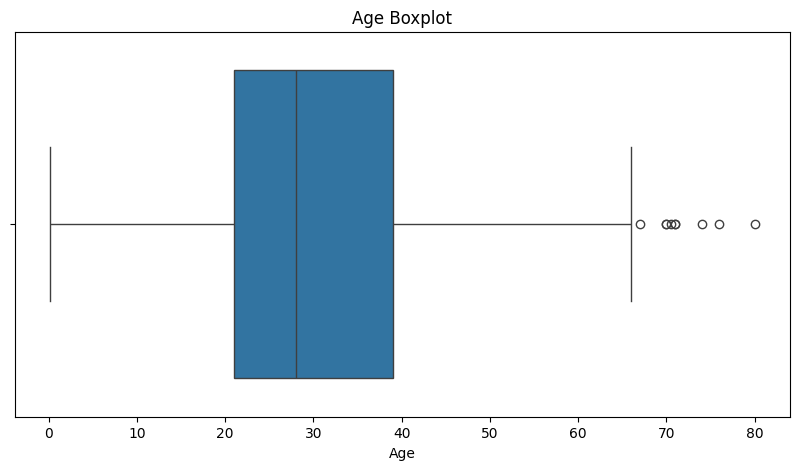

In [50]:
# Age Analysis

# Summary statistics for the age column
print(Data['age'].describe())

# Boxplot to visualize outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=Data['age'])
plt.title('Age Boxplot')
plt.xlabel('Age')
plt.show()

In [51]:
# Checking missing values and descriptive statistics once again
print(Data.isnull().sum())
print('')
print(Data.describe(include="all"))
print('')

Data.head()

pclass            0
survived          0
sex               0
age             263
fare              1
embarked          2
title             0
family_size       0
cabin_1        1014
dtype: int64

             pclass     survived   sex          age         fare embarked  \
count   1309.000000  1309.000000  1309  1046.000000  1308.000000     1307   
unique          NaN          NaN     2          NaN          NaN        3   
top             NaN          NaN  male          NaN          NaN        S   
freq            NaN          NaN   843          NaN          NaN      914   
mean       2.294882     0.381971   NaN    29.881135    33.295479      NaN   
std        0.837836     0.486055   NaN    14.413500    51.758668      NaN   
min        1.000000     0.000000   NaN     0.166700     0.000000      NaN   
25%        2.000000     0.000000   NaN    21.000000     7.895800      NaN   
50%        3.000000     0.000000   NaN    28.000000    14.454200      NaN   
75%        3.000000     1.000000   N

,pclass,survived,sex,age,fare,embarked,title,family_size,cabin_1
0,1.0,1.0,female,29.0000,211.3375,S,Miss,1.0,B
1,1.0,1.0,male,0.9167,151.5500,S,Master,4.0,C
2,1.0,0.0,female,2.0000,151.5500,S,Miss,4.0,C
3,1.0,0.0,male,30.0000,151.5500,S,Mr,4.0,C
4,1.0,0.0,female,25.0000,151.5500,S,Mrs,4.0,C


In [37]:
# Age Analysis: I can see that it is a floating-point variable, with a maximum value of 80 and a minimum of 0.16.
# Additionally, there are 263 missing values.

# Cabin analysis: We can see that it is an object-type variable.
# It has a total of 1,014 missing values.
# Based on the k-nearest neighbors, we estimate the imputation of missing values in variables such as age and cabin.

# I ensure that categorical variables can be used in a machine learning model by handling missing values with different strategies.
# To make my model more representative and to test it with different approaches, I normalize some variables.

sex_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute NaNs with the mode
    ('ordinal', OrdinalEncoder())
])

embarked_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute NaNs with the mode
    ('ordinal', OrdinalEncoder())
])

scaler = RobustScaler()

fare_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute NaNs with the median
    ('scaler', scaler)
])

age_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', scaler)
])

cabin_pipeline = Pipeline(steps=[
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),  # Convert letters to numbers
    ('imputer', KNNImputer(n_neighbors=5))                                             # Impute missing values
])

t1 = ('age', age_pipeline, ['age'])
t2 = ('cabin_1', cabin_pipeline, ['cabin_1'])
t3 = ('sex', sex_pipeline, ['sex'])
t4 = ('embarked', embarked_pipeline, ['embarked'])
t5 = ('fare', fare_pipeline, ['fare'])
t6 = ('title', OrdinalEncoder(), ['title'])

column_transformer = ColumnTransformer(transformers=[t1, t2, t3, t4, t5, t6], remainder='passthrough')

# Transform the training, validation, and test sets
X_train_val_transformed = column_transformer.fit_transform(X_train_val)

# Retrieve the new column names
new_columns = column_transformer.get_feature_names_out()
print(new_columns)

# Create a DataFrame for the transformed training set (X_train_val)
X_train_val_transformed = pd.DataFrame(X_train_val_transformed, columns=new_columns)

# Transform the validation set
X_test_val_transformed = column_transformer.transform(X_test_val)
X_test_val_transformed = pd.DataFrame(X_test_val_transformed, columns=new_columns)

# Transform the test set and create the DataFrame for X_test
X_test_transformed = column_transformer.transform(X_test)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=new_columns)

# Transform the training set and create the DataFrame for X_train
X_train_transformed = column_transformer.transform(X_train)
X_train_transformed = pd.DataFrame(X_train_transformed, columns=new_columns)

['age__age' 'cabin_1__cabin_1' 'sex__sex' 'embarked__embarked'
 'fare__fare' 'title__title' 'remainder__pclass' 'remainder__family_size']


In [52]:
# Get the mapping of cabin letters to their numerical values
encoder = OrdinalEncoder()
encoder.fit(X_train_val[['cabin_1']])
cabin_mapping = dict(zip(encoder.categories_[0], range(len(encoder.categories_[0]))))
print("Mapping of cabin letters to numbers:", cabin_mapping)

Mapping of cabin letters to numbers: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7, nan: 8}


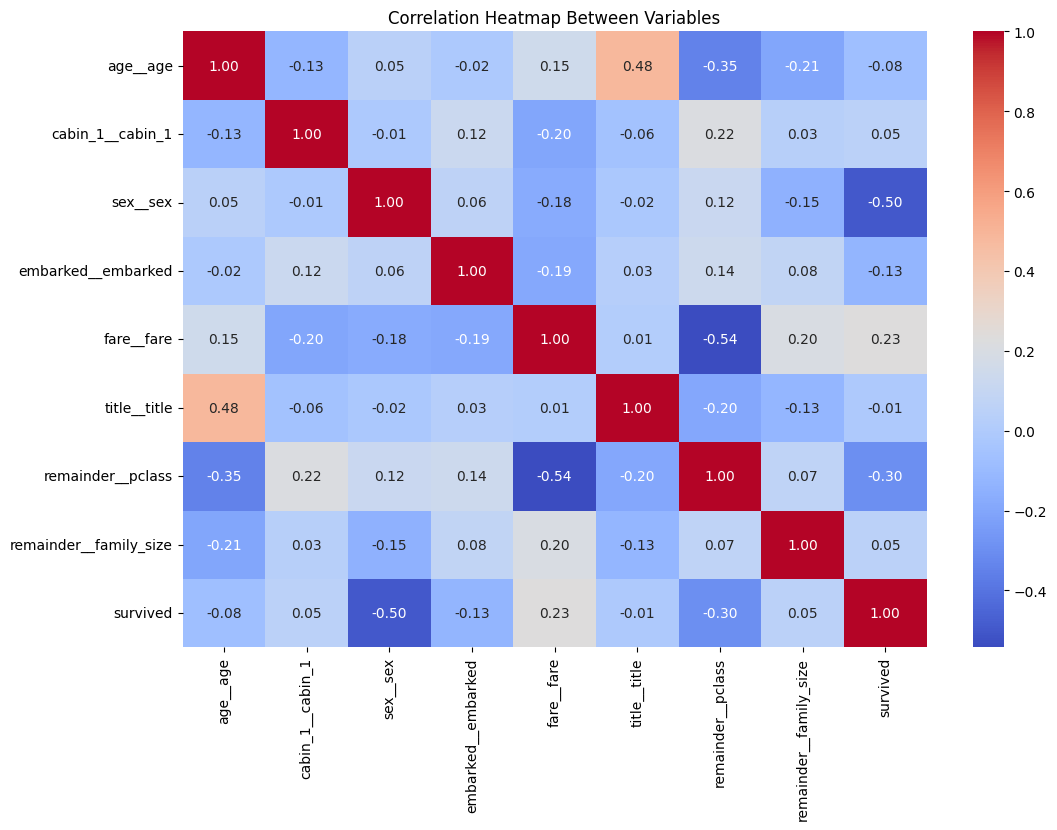

In [53]:
# Correlation between numerical variables

# Create a temporary DataFrame that includes X_train_val_transformed and y_train_val
data_with_target = X_train_val_transformed.copy()
data_with_target['survived'] = y_train_val.reset_index(drop=True)  # Add the target variable

plt.figure(figsize=(12, 8))
sns.heatmap(data_with_target.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap Between Variables')
plt.show()

In [54]:
# sex (-0.50): The sex variable shows a significant negative correlation with survived,
# indicating that gender is a strong predictor of survival.
# Generally, in the case of the Titanic, it is known that women had higher survival rates.
# Using the OrdinalEncoder, the number 0 was assigned to females and the number 1 to males.
# Therefore, a negative correlation with the sex column means that being female (0) is associated
# with a higher probability of survival, while a positive value (closer to male) would indicate
# a lower probability of survival.

# pclass (-0.30): Passenger class is also negatively correlated with survival, indicating that
# passengers in lower classes (e.g., third class) had lower survival rates.
# The negative correlation indicates that higher classes (lower pclass values, such as 1 for first class)
# have a higher probability of survival.
# Conversely, lower classes (higher pclass values, such as 3 for third class) are associated with a lower probability of survival.

# fare (0.23): The fare paid shows a positive correlation with survived, suggesting that passengers
# who paid higher fares (probably related to higher classes) were more likely to survive.

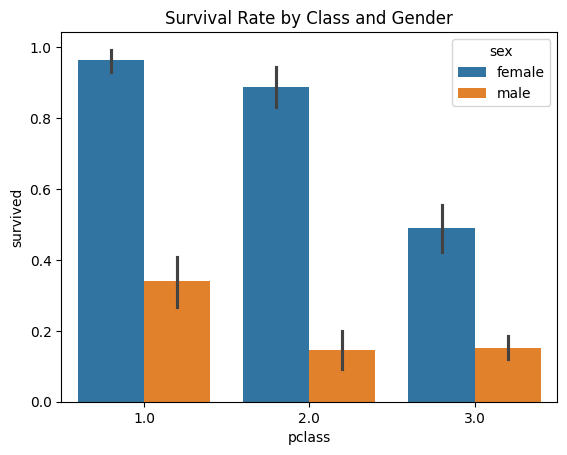

In [55]:
# Bar chart of survival rate by class and gender
sns.barplot(data=Data, x='pclass', y='survived', hue='sex')
plt.title('Survival Rate by Class and Gender')
plt.show()

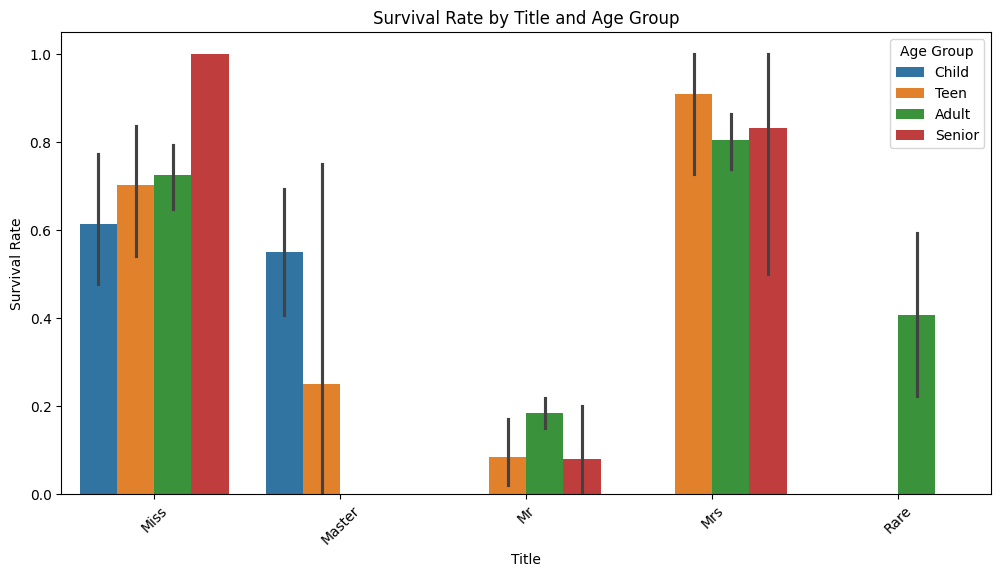

In [56]:
# Create a new column 'age_group' by dividing age into ranges
Data['age_group'] = pd.cut(Data['age'], bins=[0, 12, 18, 60, 80], labels=['Child', 'Teen', 'Adult', 'Senior'])

# Bar chart to visualize survival rate by title and age group
plt.figure(figsize=(12, 6))
sns.barplot(data=Data, x='title', y='survived', hue='age_group')
plt.title('Survival Rate by Title and Age Group')
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.legend(title='Age Group')
plt.xticks(rotation=45)
plt.show()

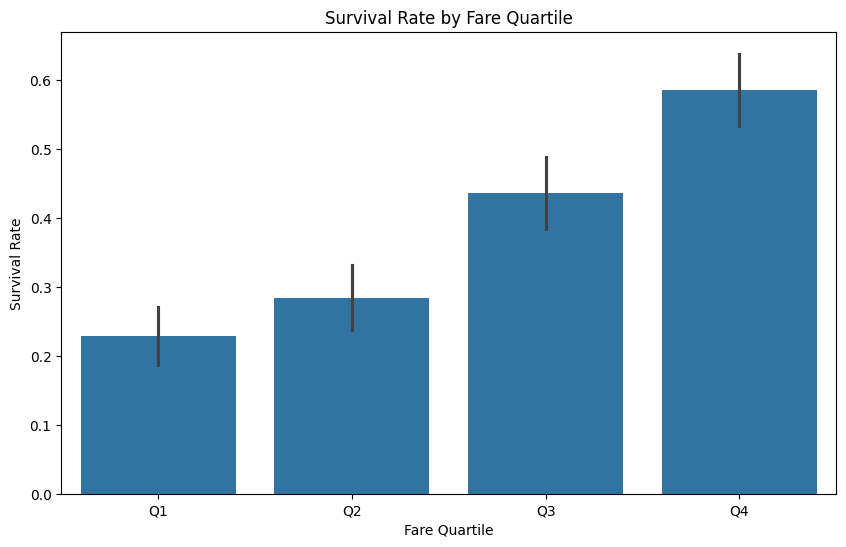

In [57]:
# Create a new column that divides 'fare' into quartiles
Data['fare_quartile'] = pd.qcut(Data['fare'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Bar chart of survival rate by fare quartile
plt.figure(figsize=(10, 6))
sns.barplot(data=Data, x='fare_quartile', y='survived')
plt.title('Survival Rate by Fare Quartile')
plt.xlabel('Fare Quartile')
plt.ylabel('Survival Rate')
plt.show()

# There is a clear positive trend: as fare increases (from Q1 to Q4), the survival rate also increases.
# Passengers who paid higher fares (Q4) have a significantly higher survival rate compared to those in lower quartiles,
# especially in comparison to the first quartile (Q1).

<ipython-input-58-7fb96e8d718f>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Survival')


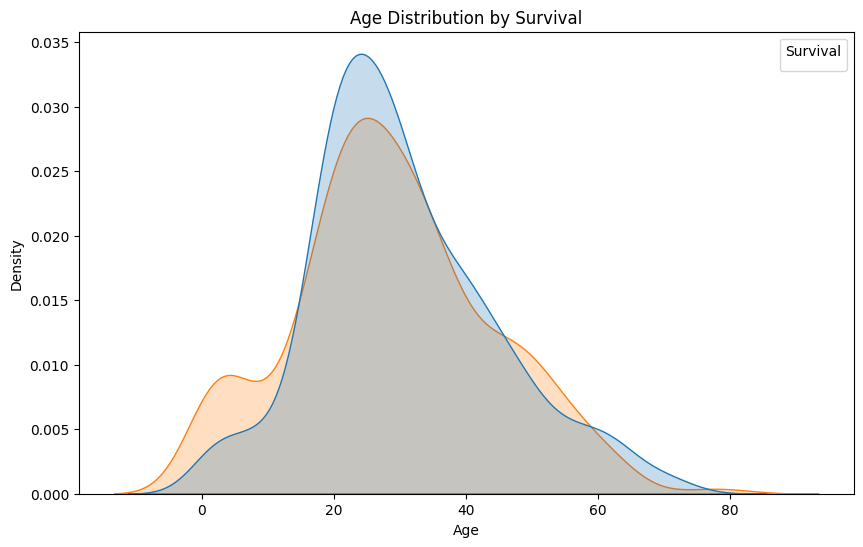

In [58]:
# Density plot for age distribution by survival
plt.figure(figsize=(10, 6))
sns.kdeplot(data=Data, x='age', hue='survived', common_norm=False, fill=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survival')
plt.show()

In [59]:
X_test_transformed.head()
X_test_transformed.shape
# This dataset represents the TEST set, which contains 393 samples and 8 features.
# It represents 30% of the original dataset.

(393, 8)

In [60]:
X_train_val_transformed.shape
# The TRAINING set for validation contains 641 samples and 8 features after transformation.
# The original dataset was split into 70% training. Then, from that 70%, 70% was used for training and 30% for validation.

(641, 8)

In [61]:
X_test_val_transformed.shape
# The VALIDATION set (extracted from the original training set) contains 275 samples and 8 features.
# It represents 30% of the initial 70% of the dataset, which is approximately 21% of the total.


(275, 8)

In [62]:
# Check for NaN values in the columns before selecting the best model

X_train_transformed.isna().sum()
X_test_transformed.isna().sum()
X_train_val_transformed.isna().sum()
X_test_val_transformed.isna().sum()

,0
age__age,0
cabin_1__cabin_1,0
sex__sex,0
embarked__embarked,0
fare__fare,0
title__title,0
remainder__pclass,0
remainder__family_size,0


In [63]:
# With the prepared dataset, we determine which is the best model

# Define the Logistic Regression model and the parameters to tune
log_reg = LogisticRegression(max_iter=1000)
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization
}

# Cross-validation using GridSearchCV
log_reg_cv = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='f1')
log_reg_cv.fit(X_train_val_transformed, y_train_val)

# Get the best model and evaluate it on the validation set
best_log_reg = log_reg_cv.best_estimator_

# Evaluation function
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    return accuracy, precision, recall, f1

# Run evaluation on the training and validation set
accuracy, precision, recall, f1 = evaluate_model(best_log_reg, X_test_val_transformed, y_test_val)

# Print results
print("Evaluation results on the training and validation set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Evaluation results on the training and validation set:
Accuracy: 0.8036
Precision: 0.7576
Recall: 0.7143
F1 Score: 0.7353


In [64]:
# With the prepared dataset, we determine which is the best model

# Define the Decision Tree model and hyperparameters
tree = DecisionTreeClassifier(random_state=123)
tree_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Hyperparameter tuning using GridSearchCV on the training set
tree_cv = GridSearchCV(tree, tree_params, cv=5, scoring='f1')
tree_cv.fit(X_train_val_transformed, y_train_val)

# Get the best model and evaluate it on the validation set
best_tree = tree_cv.best_estimator_

# Predict on the validation set
y_val_pred = best_tree.predict(X_test_val_transformed)

# Evaluate model performance on the validation set
accuracy = accuracy_score(y_test_val, y_val_pred)
precision = precision_score(y_test_val, y_val_pred)
recall = recall_score(y_test_val, y_val_pred)
f1 = f1_score(y_test_val, y_val_pred)

# Print results
print("Evaluation results on the validation set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Evaluation results on the validation set:
Accuracy: 0.8364
Precision: 0.8000
Recall: 0.7619
F1 Score: 0.7805


In [65]:
# With the prepared dataset, we determine which is the best model

# Define the Random Forest model and hyperparameters
rf = RandomForestClassifier(random_state=123)
rf_params = {
    'n_estimators': [50, 100, 200],          # Number of trees in the forest
    'max_depth': [3, 5, 10, None],           # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split a node
}

# Hyperparameter tuning using GridSearchCV on the training set
rf_cv = GridSearchCV(rf, rf_params, cv=5, scoring='f1')
rf_cv.fit(X_train_val_transformed, y_train_val)

# Get the best model and evaluate it on the validation set
best_rf = rf_cv.best_estimator_

# Predict on the validation set
y_val_pred = best_rf.predict(X_test_val_transformed)

# Evaluate model performance on the validation set
accuracy = accuracy_score(y_test_val, y_val_pred)
precision = precision_score(y_test_val, y_val_pred)
recall = recall_score(y_test_val, y_val_pred)
f1 = f1_score(y_test_val, y_val_pred)

# Print results
print("Evaluation results on the validation set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Evaluation results on the validation set:
Accuracy: 0.7927
Precision: 0.7449
Recall: 0.6952
F1 Score: 0.7192


In [66]:
# With the prepared dataset, we determine which is the best model

# Define the SVM model and hyperparameters
svm = SVC()
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Hyperparameter tuning using GridSearchCV on the training set
svm_cv = GridSearchCV(svm, svm_params, cv=5, scoring='f1')
svm_cv.fit(X_train_val_transformed, y_train_val)

# Get the best model and evaluate it on the validation set
best_svm = svm_cv.best_estimator_

# Make predictions on the validation set
y_val_pred = best_svm.predict(X_test_val_transformed)

# Evaluate model performance on the validation set
accuracy = accuracy_score(y_test_val, y_val_pred)
precision = precision_score(y_test_val, y_val_pred)
recall = recall_score(y_test_val, y_val_pred)
f1 = f1_score(y_test_val, y_val_pred)

# Print evaluation results
print("Evaluation results on the validation set with the best SVM model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Evaluation results on the validation set with the best SVM model:
Accuracy: 0.8036
Precision: 0.7383
Recall: 0.7524
F1 Score: 0.7453


In [67]:
# The highest accuracy is achieved with the Decision Tree, whose model yields
# an accuracy of 0.8364. This is the model we will use to train with 100% of the data.

Evaluation results on the full dataset:
Accuracy: 0.8219
Precision: 0.7926
Recall: 0.7181
F1 Score: 0.7535

Some predictions on the test set:
[1. 0. 1. 0. 0. 0. 1. 1. 0. 1.]


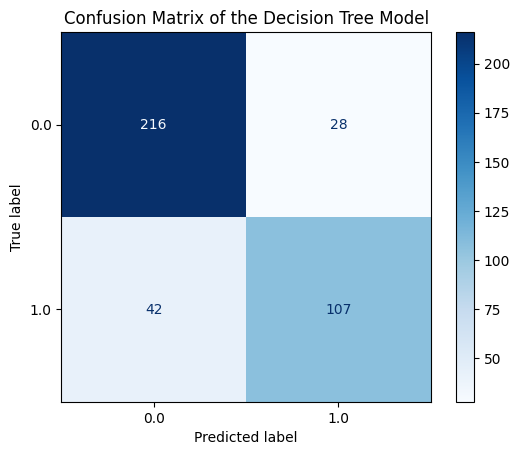

In [68]:
# Define the Decision Tree model and hyperparameters
tree = DecisionTreeClassifier(random_state=123)
tree_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Hyperparameter tuning using GridSearchCV on the training set
tree_cv = GridSearchCV(tree, tree_params, cv=5, scoring='f1')
tree_cv.fit(X_train_transformed, y_train)

# Get the best model and evaluate it on the validation set
best_tree = tree_cv.best_estimator_

# Predict on the validation set
y_pred = best_tree.predict(X_test_transformed)

# Evaluate model performance on the full dataset
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print("Evaluation results on the full dataset:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Make predictions on the test set
y_pred = best_tree.predict(X_test_transformed)

# Display some predictions
print("\nSome predictions on the test set:")
print(y_pred[:10])  # Show the first 10 predictions

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix visually
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_tree.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix of the Decision Tree Model")
plt.show()

In [ ]:
# Accuracy:
#The overall accuracy is 82.19%, meaning that the model correctly predicted whether a person survived or not in approximately 82% of the cases.

# Precision:

# For class 0 (did not survive), the precision is 0.79, meaning that 79% of the people the model predicted as not surviving actually did not survive.
# For class 1 (survived), the precision is also 0.79, indicating that 79% of the people the model predicted as survivors actually survived.

# Recall:

# For class 0 (did not survive), the recall is 0.72, meaning that the model correctly identified 72% of the people who did not survive.
# For class 1 (survived), the recall is 0.71, meaning that the model correctly identified 71% of the survivors.

#F1 Score:
#The F1 Score is the harmonic mean between precision and recall, providing a balanced metric between both.

#For class 0 (did not survive), the F1 Score is 0.75, indicating a good balance between precision and recall.
#For class 1 (survived), the F1 Score is 0.75, suggesting that the model maintains a fairly balanced performance in predicting survival and non-survival.

# FINAL ASSESSMENT:

# This Decision Tree model achieves a strong overall accuracy (82.19%), with balanced precision and recall scores.
#While it slightly underperforms in recall (0.71 for survivors), it maintains a solid F1 Score (0.75 for both classes),
#making it a reliable model for predicting Titanic survival outcomes.

